# Introduction - importing dataset and libraries

In [71]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [72]:
#saving the csv as a dataframe
df = pd.read_csv('coursework_other.csv')

In [73]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [74]:
print(len(df.columns))

5


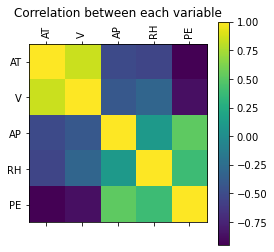

In [75]:
#plot to show how each variable is correlated with each other
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.title("Correlation between each variable")

plt.show()

In [76]:
#splitting the csv file and saving X variables (AT, V, AP, RH) into a separate df to the target y variable(PE)
X = np.array(df[["AT", "V", "AP", "RH"]])
y = np.array(df["PE"])


In [77]:
#importing the train_test_split function to use it to split the variables into a training and test set,
#I used test size = 0.2 for 80% for training data and 20% for test with random state = 42 to keep the same dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)
Xtr, X_val, ytr, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True, random_state = 42)

In [78]:
#checking the shape of eaach dataset so I can understand how many datapoints are in each dataset for future purposes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of Xtr:", Xtr.shape)
print("Shape of ytr:", ytr.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (7654, 4)
Shape of y_train: (7654,)
Shape of X_test: (1914, 4)
Shape of y_test: (1914,)
Shape of Xtr: (6123, 4)
Shape of ytr: (6123,)
Shape of X_val: (1531, 4)
Shape of y_val: (1531,)


# Regression problem - testing linear regression with r2 

In [79]:
#fitting the linear regression model to the training dataset and then predicting the output using the validation dataset
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(Xtr, ytr)
y_pred = linreg.predict(X_val)

print(y_pred)
print(y_pred.shape)

[462.28120595 436.76104781 434.92137032 ... 479.39894621 442.88120054
 436.37587984]
(1531,)


In [80]:
#using r2 as a performance metric and testing the r2 score
from sklearn.metrics import r2_score
r2_lr_val = r2_score(y_val, y_pred)
print(f"r2 score for linreg using validation dataset: {r2_lr_val:.3f}")

r2 score for linreg using validation dataset: 0.922


In [81]:
#cross-validation the linear regression model with the validation training set
from sklearn.model_selection import cross_validate
linreg_scores = cross_validate(linreg, Xtr, ytr, return_estimator = True)
print("Linear regression score:", linreg_scores["test_score"].mean())

Linear regression score: 0.9297992743279625


0.93 score for r2 shows that the variables are highly correlated which shows that the linear regression model has been very successful at predicting the output variable for this dataset.

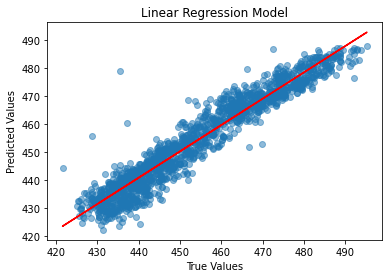

In [82]:
#plotting a scatter diagram for linear the regression model that comapares the true and predicted values of the model

plt.scatter(y_val, y_pred, alpha = 0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model")

p = np.polyfit(y_val, y_pred, 1)
f = np.poly1d(p)
plt.plot(y_val, f(y_val), 'r-')

plt.show()

This graph shows that the linear regression model performed relatively well for this dataset as the correlation of the graph is distinctly positive for predicted and true values which shows that the model is good at predicting the output value. There are several outliers as expected with this model considering the dataset is not that large. The more important tests with the validation dataset will show more accurately if this model is a good predictor as it will use unseen data. 

# Testing MSE as a perfomance metric alternative to r2 

In [83]:
#using mse to test performance of the model using validation set

from sklearn.metrics import mean_squared_error

mse_lr_val = mean_squared_error(y_val, y_pred.reshape(-1,1))

print(f"Mean Squared Error: {mse_lr_val}")

Mean Squared Error: 22.331358255132834


# Testing polynomial regression and comparing it to Linear Regression

In [84]:
#Using polynomial linear regression instead and comparing it to Linear Regression on the test dataset

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7)  #degree = 6 gives the lowest value for MSE for the test dataset
X_train_poly = poly.fit_transform(Xtr)
X_val_poly = poly.transform(X_val)

linreg_poly = LinearRegression()
linreg_poly.fit(X_train_poly, ytr)
y_pred_poly = linreg_poly.predict(X_val_poly)

In [85]:
r2_poly_val = r2_score(y_val, y_pred_poly)
print(f"r2 score for polynomial regression using the validation dataset: {r2_poly_val}")

r2 score for polynomial regression using the validation dataset: 0.9374440638758377


In [86]:
#calculating MSE of the polynomial regression on validation dataset

mse_poly_val = mean_squared_error(y_val, y_pred_poly)

print(f"Polynomial MSE for validation dataset: {mse_poly_val}")

Polynomial MSE for validation dataset: 17.949648829939594


# Using the validation set (unseen data) on both linear regression and polynomial regression

In [17]:
#using k fold cross validation on the linear regression model for the validation set using both MSE and r2.
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
mse_scores = cross_val_score(linreg, Xtr, ytr, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(linreg, Xtr, ytr, cv=kf, scoring='r2')

mse_lr_cv = -mse_scores.mean()
r2_lr_cv = r2_scores.mean()

print(f"KFold Cross Validation MSE: {mse_lr_cv}")
print(f"KFold Cross Validation R2: {r2_lr_cv}")

linreg_final = LinearRegression()
linreg_final.fit(Xtr, ytr)
y_pred_val = linreg_final.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"Validation Set MSE: {mse_val}")
print(f"Validation Set R2: {r2_val}")


KFold Cross Validation MSE: 20.566063390903803
KFold Cross Validation R2: 0.9297132925689151
Validation Set MSE: 22.331358255132834
Validation Set R2: 0.9221734623440777


Cross validation values for MSE and r2 are slightly better than the validation training set. This is expected as cross validation uses multiple training splits to get a better fit for the dataset rather than normal validation which only uses a singular split of the data.

In [18]:
#Using cross-validation for polynomial regression, this allows me to use the cross-validation scores to be able to 
#tune for the optimal 'degree' hyperparameter
from sklearn.pipeline import Pipeline

kf = KFold(n_splits=5, shuffle=True, random_state=42)
poly_cv = PolynomialFeatures(degree=4)
linreg = LinearRegression()

#creating a pipeline for polynomial and linear regression
pipeline = Pipeline([
    ('polynomial_features', poly_cv),
    ('linear_regression', linreg)
])

mse_scores_poly = cross_val_score(pipeline, Xtr, ytr, cv=kf, scoring='neg_mean_squared_error')
r2_scores_poly = cross_val_score(pipeline, Xtr, ytr, cv=kf, scoring='r2')

mse_poly_cv = -mse_scores_poly.mean()
r2_poly_cv = r2_scores_poly.mean()

print(f"KFold Cross Validation MSE: {mse_poly_cv}")
print(f"KFold Cross Validation R2: {r2_poly_cv}")


KFold Cross Validation MSE: 16.77552134160173
KFold Cross Validation R2: 0.942673190752887


In [19]:
#running a gridsearch on the polynomial regression model to tune for the optimal hyperparameter. Polynomial Regression
#only uses 1 hyperparameter which is 'degree' so it is a fast process time.

#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the Kfold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline combining PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('linear_regression', LinearRegression())
])

# Define the hyperparameters to tune and their possible values
param_grid = {
    'polynomial_features__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] }

#running the grid search using the pipeline created and using the kfold cross-val with 5 folds, MSE is used as the
#performance metric
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

#fitting the gridsearch to the whole training data, cross-validation takes care of the necessary splits
grid_search.fit(Xtr, ytr)

#displaying the optimal hyperparameters
best_params = grid_search.best_params_

#displaying the best model to use
best_model = grid_search.best_estimator_

print(f"Best hyperparameters: {best_params}")
print(f"Best model: {best_model}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'polynomial_features__degree': 4}
Best model: Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=4)),
                ('linear_regression', LinearRegression())])


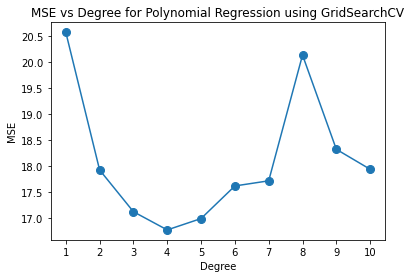

In [20]:
#plotting a graph to show how MSE changes for the 'degree' used for the polynomial regression hyperparameter
import matplotlib.pyplot as plt
import numpy as np

#calculating the cross-validated MSE mean scores for each degree to be able to plot on the y axis
mse_scores = -grid_search.cv_results_['mean_test_score']

#extracting the values used for degree to be able to plot on the x axis
degrees = param_grid['polynomial_features__degree']

#plotting the graph for MSE vs Degree
plt.plot(degrees, mse_scores, marker='o', linestyle='-', markersize=8)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE vs Degree for Polynomial Regression using GridSearchCV')
plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))


plt.show()


Polynomial regression performs better than linear regression on the validation set which is the same as the test set. On the validation set the values are slightly closer than the test set which is expected as it using unseen data. 

In [21]:
from sklearn.metrics import mean_squared_error

#fitting the best model found in previous step to the training data
best_model.fit(Xtr, ytr)

# Make predictions on the test set
y_pred = best_model.predict(X_val)

# Calculate the MSE between the test set and the predictions
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE for the best model with optimal degree: {mse}")
print(f"r2 for the best model with optimal degree: {r2}")

MSE for the best model with optimal degree: 18.420389471225896
r2 for the best model with optimal degree: 0.9358034957640964


#  Calculating the optimal value for MSE using different values of degree on ther polynomial regression model for the validation set

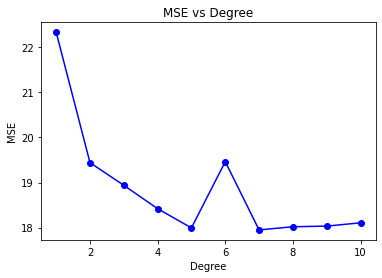

In [22]:

degrees = range(1, 11)
mse_values = []

for degree in degrees:
    # Fit polynomial regression model
    poly = PolynomialFeatures(degree=degree)
    Xtr_poly = poly.fit_transform(Xtr)
    X_val_poly = poly.transform(X_val)
    linreg_val_poly = LinearRegression()
    linreg_val_poly.fit(Xtr_poly, ytr)
    
    # Predict on validation set
    ypred_val_poly = linreg_val_poly.predict(X_val_poly)
    
    # Compute MSE
    mse_val_poly = mean_squared_error(y_val, ypred_val_poly)
    mse_values.append(mse_val_poly)
    
# Plot MSE values against degree
plt.plot(degrees, mse_values, 'bo-')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE vs Degree')
plt.show()

As seen by this graph, the lowest value for MSE is at degree 7 for the polynomial regression model on the validation set.

In [23]:
#calculating MSE on validation set for polynomial regression and comparing it to the MSE on validation set for linear regression

mse_val_poly = mean_squared_error(y_val, ypred_val_poly)

print(f"Validation Polynomial MSE: {mse_val_poly}")

Validation Polynomial MSE: 18.10702099018262


In [24]:
#doing the same but for polynomial regression and also printing each MSE value for each datapoint in the validation set
for i in range(len(X_val_poly)):
    x_i = X_val_poly[i]
    y_true_i = y_val[i]
    y_pred_i = linreg_val_poly.predict(x_i.reshape(1, -1))[0]
    mse_i = mean_squared_error([y_true_i], [y_pred_i])
    print(f"Point {i}: True={y_true_i}, Predicted={y_pred_i:.3f}, MSE={mse_i:.3f}")


Point 0: True=466.73, Predicted=465.288, MSE=2.079
Point 1: True=436.21, Predicted=439.460, MSE=10.560
Point 2: True=434.56, Predicted=434.305, MSE=0.065
Point 3: True=449.8, Predicted=444.626, MSE=26.765
Point 4: True=462.19, Predicted=460.464, MSE=2.978
Point 5: True=467.1, Predicted=464.342, MSE=7.605
Point 6: True=474.28, Predicted=471.994, MSE=5.225
Point 7: True=437.93, Predicted=436.520, MSE=1.987
Point 8: True=448.91, Predicted=449.576, MSE=0.444
Point 9: True=444.41, Predicted=443.559, MSE=0.725
Point 10: True=443.42, Predicted=446.657, MSE=10.481
Point 11: True=474.49, Predicted=473.718, MSE=0.596
Point 12: True=446.54, Predicted=444.647, MSE=3.584
Point 13: True=488.2, Predicted=483.948, MSE=18.079
Point 14: True=432.26, Predicted=433.265, MSE=1.009
Point 15: True=479.11, Predicted=474.690, MSE=19.537
Point 16: True=440.74, Predicted=440.192, MSE=0.300
Point 17: True=433.71, Predicted=441.486, MSE=60.464
Point 18: True=469.52, Predicted=465.875, MSE=13.283
Point 19: True=463

Point 1126: True=465.51, Predicted=467.676, MSE=4.691
Point 1127: True=463.79, Predicted=468.046, MSE=18.115
Point 1128: True=434.41, Predicted=439.140, MSE=22.369
Point 1129: True=431.72, Predicted=435.116, MSE=11.530
Point 1130: True=476.81, Predicted=475.612, MSE=1.435
Point 1131: True=435.9, Predicted=433.591, MSE=5.329
Point 1132: True=434.82, Predicted=438.102, MSE=10.770
Point 1133: True=436.06, Predicted=435.986, MSE=0.006
Point 1134: True=473.99, Predicted=470.653, MSE=11.134
Point 1135: True=476.91, Predicted=474.437, MSE=6.114
Point 1136: True=453.3, Predicted=453.038, MSE=0.069
Point 1137: True=436.69, Predicted=439.384, MSE=7.256
Point 1138: True=485.24, Predicted=488.569, MSE=11.081
Point 1139: True=437.91, Predicted=433.616, MSE=18.435
Point 1140: True=472.95, Predicted=468.631, MSE=18.652
Point 1141: True=455.29, Predicted=460.067, MSE=22.820
Point 1142: True=432.58, Predicted=435.815, MSE=10.463
Point 1143: True=485.1, Predicted=484.829, MSE=0.073
Point 1144: True=433.

# Fitting a random forest model on the test dataset

In [25]:
#importing and fitting the random forest regressor model from sklearn - fitting it on the training data set and 
#then predicting it on the test dataset to see how well it performs on unseen data - the hyperparameters I have used 
#will be explained further below where I used gridsearch for hyperparameter tuning.

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap = False, max_depth = 25, max_features = 'log2', min_samples_leaf = 1,
                           min_samples_split = 3, n_estimators = 100, random_state = 42)
rf.fit(Xtr, ytr)
y_pred_rf = rf.predict(X_val)

print(y_pred_rf)
print(y_pred_rf.shape)

[467.1752     439.63985    432.75193056 ... 479.6248     437.1552327
 433.2305    ]
(1531,)


In [47]:
#calculating perfomance metrics for the random forest model using the validation set (r2 and MSE)

r2_rf_val = r2_score(y_val, y_pred_rf)
print(f"r2 score for randomforest using validation dataset: {r2_rf_val}")

mse_rf_val = mean_squared_error(y_val, y_pred_rf)
print(f"MSE for randomforest using validation dataset: {mse_rf_val}")

r2 score for randomforest using validation dataset: 0.9575604213825457
MSE for randomforest using validation dataset: 12.177509919473183


An instant improvement in r2 score and MSE  compared to both linear and polynomial regression for the test dataset.

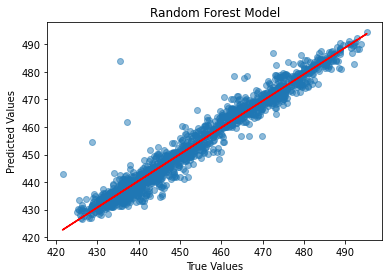

In [48]:
#graph to show how well correlated the true and predicted values are for the random forest regressor model.
plt.scatter(y_val, y_pred_rf, alpha = 0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Model")

p = np.polyfit(y_val, y_pred_rf, 1)
f = np.poly1d(p)
plt.plot(y_val, f(y_val), 'r-')

plt.show()

As shown by a similar plot to the linear regression model, the predicted and true values are even more strongly positively correlated, showing that the random forest model is a better predictor for the test dataset. Outliers are still present as expected.

In [28]:
#taking a look at the hyperparameters that are currently in use for my random forest regression model so I can understand
#which ones hyperparameters I want to tune to get the most accurate results for the random forest model.

from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 25,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [54]:
#performing gridsearch on the random forest regressor model to find optimal solutions for hyperparameters
#this grid search takes a very long time to run (over 15 minutes) - I have pasted the outputs for best parameters and 
#best scores to a markdown cell below

from sklearn.model_selection import GridSearchCV

#setting a variable to include all hyperparameters to use for the gridsearch with all possible values.
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
    'max_depth': [5, 10, 15, 25],
    'max_features': ['auto', 'log2'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3, 4, 5],
    'bootstrap': [True, False]
    
}

#running the grid search and printing the output for best parameters and best score using the grid search functions.
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose = 1, n_jobs = -1, scoring = 'neg_mean_squared_error')
grid_search.fit(Xtr, ytr)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
Best Parameters: {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 90}
Best Score: -11.31887643229176


Best Parameters: {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 90}
Best Score: 0.9613688217627875

Scores for the training and validation sets are close to 1.0 showing almost a perfect fit for the model on each dataset. The test dataset is slightly lower as it is on unseen data which is expected.

In [55]:
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [5, 10, 15, 25], 'max_features': ['auto', 'log2'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 3, 4, 5], 'bootstrap': [True, False]}


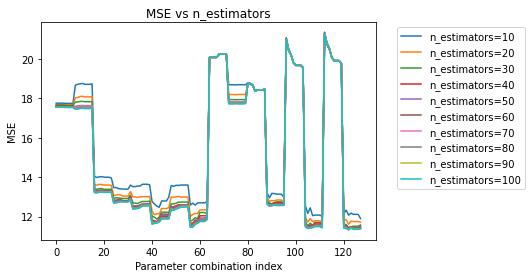

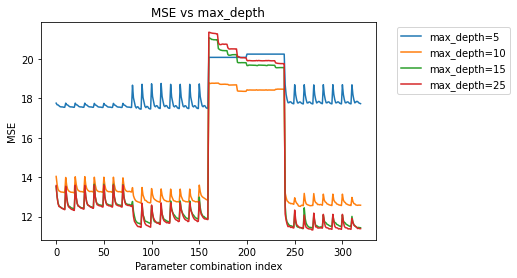

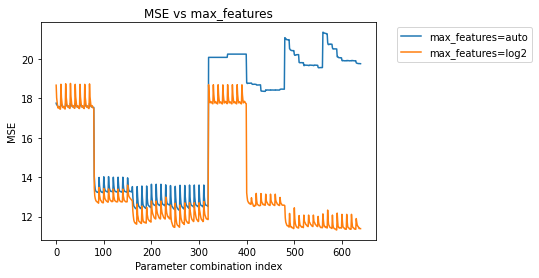

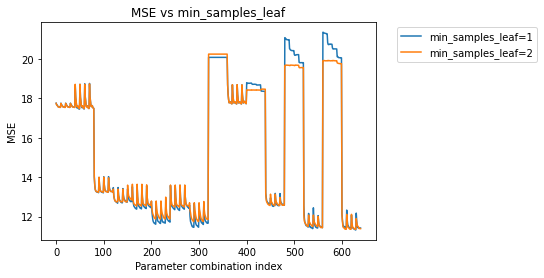

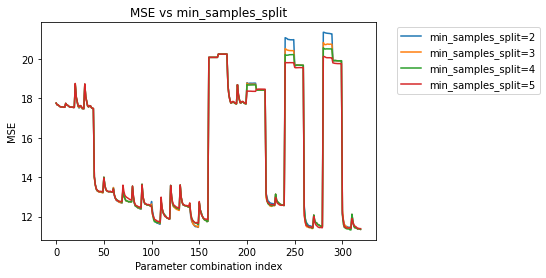

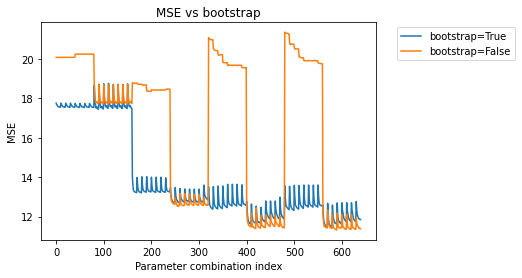

In [70]:
# Extract the mean test scores from the grid search results
neg_mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_test_scores = -neg_mean_test_scores


# Extract the parameter combinations
params = grid_search.cv_results_['params']

# Create lists to store scores for each hyperparameter value
n_estimators_scores = {}
max_depth_scores = {}
max_features_scores = {}
min_samples_leaf_scores = {}
min_samples_split_scores = {}
bootstrap_scores = {}

# Populate the lists with mean_test_scores
for i, param_set in enumerate(params):
    n_estimators = param_set['n_estimators']
    max_depth = param_set['max_depth']
    max_features = param_set['max_features']
    min_samples_leaf = param_set['min_samples_leaf']
    min_samples_split = param_set['min_samples_split']
    bootstrap = param_set['bootstrap']
    
    if n_estimators not in n_estimators_scores:
        n_estimators_scores[n_estimators] = []
    n_estimators_scores[n_estimators].append(mean_test_scores[i])
    
    if max_depth not in max_depth_scores:
        max_depth_scores[max_depth] = []
    max_depth_scores[max_depth].append(mean_test_scores[i])
    
    if max_features not in max_features_scores:
        max_features_scores[max_features] = []
    max_features_scores[max_features].append(mean_test_scores[i])
    
    if min_samples_leaf not in min_samples_leaf_scores:
        min_samples_leaf_scores[min_samples_leaf] = []
    min_samples_leaf_scores[min_samples_leaf].append(mean_test_scores[i])
    
    if min_samples_split not in min_samples_split_scores:
        min_samples_split_scores[min_samples_split] = []
    min_samples_split_scores[min_samples_split].append(mean_test_scores[i])
    
    if bootstrap not in bootstrap_scores:
        bootstrap_scores[bootstrap] = []
    bootstrap_scores[bootstrap].append(mean_test_scores[i])

# Function to plot hyperparameter values against mean_test_scores
def plot_hyperparameter_scores(hyperparameter_scores, xlabel):
    plt.figure()
    for value, scores in hyperparameter_scores.items():
        plt.plot(range(len(scores)), scores, label=f'{xlabel}={value}')
    plt.xlabel('Parameter combination index')
    plt.ylabel('MSE')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(f'MSE vs {xlabel}')
    plt.show()

# Create plots for each hyperparameter
# Create plots for each hyperparameter
plot_hyperparameter_scores(n_estimators_scores, 'n_estimators')
plot_hyperparameter_scores(max_depth_scores, 'max_depth')
plot_hyperparameter_scores(max_features_scores, 'max_features')
plot_hyperparameter_scores(min_samples_leaf_scores, 'min_samples_leaf')
plot_hyperparameter_scores(min_samples_split_scores, 'min_samples_split')
plot_hyperparameter_scores(bootstrap_scores, 'bootstrap')



In [58]:
ypred_val_rf = rf.predict(X_val)
print(ypred_val_rf)

r2 = r2_score(y_val, ypred_val_rf)
print(r2)

mse = mean_squared_error(y_val, ypred_val_rf)
print(mse)

[467.1752     439.63985    432.75193056 ... 479.6248     437.1552327
 433.2305    ]
0.9575604213825457
12.177509919473183


In [65]:
rf = RandomForestRegressor(bootstrap = False, max_depth = 25, max_features = 'log2', min_samples_leaf = 1,
                           min_samples_split = 3, n_estimators = 90, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf_test = rf.predict(X_test)

print(y_pred_rf_test)
print(y_pred_rf_test.shape)

mse = mean_squared_error(y_test, y_pred_rf_test)
print(mse)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)




mse_lr = mean_squared_error(y_test, y_pred_lr)
print(mse_lr)

[455.80144444 436.00901975 435.80583796 ... 482.94877778 434.38511111
 457.31938889]
(1914,)
9.307771698771377
20.27370599968743


In [34]:
comparison_df_rf = pd.DataFrame({"Actual":y_val,"Predicted":y_pred_rf_val})
comparison_df_rf

,Actual,Predicted
0,466.73,467.175200
1,436.21,439.639850
2,434.56,432.751931
3,449.80,445.568150
4,462.19,460.285750
...,...,...
1526,461.54,466.810100
1527,468.64,472.146400
1528,479.69,479.624800
1529,440.17,437.155233


In [35]:
r2 = r2_score(y_val, y_pred_rf_val)
print(r2)

mse = mean_squared_error(y_val, y_pred_rf_val)
print(mse)

0.9575604213825457
12.177509919473183


# Using the sklearn dummy regression model as a baseline comparison 


In [38]:
#fitting the sklearn dummy regression model to the training dataset and predicting it on the validation dataset

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()
dummy.fit(Xtr, ytr)
ypred_dummy = dummy.predict(X_val)
print(ypred_dummy)
print(ypred_dummy.shape)


[454.40200882 454.40200882 454.40200882 ... 454.40200882 454.40200882
 454.40200882]
(1531,)


In [39]:
r2_dummy_val = r2_score(y_val, ypred_dummy)
print(f'r2 score for dummy model on validation data: {r2_dummy_val}')

mse_dummy_val = mean_squared_error(y_val, ypred_dummy)
print(f'mse for dummy model on validation data: {mse_dummy_val}')


r2 score for dummy model on validation data: -7.341213943878877e-05
mse for dummy model on validation data: 286.9586431643019


In [40]:
#visualising in a dataframe side by side the actual and predicted values for the dummy regression model
comparison_df = pd.DataFrame({"Actual":y_val,"Predicted":ypred_dummy})
comparison_df

,Actual,Predicted
0,466.73,454.402009
1,436.21,454.402009
2,434.56,454.402009
3,449.80,454.402009
4,462.19,454.402009
...,...,...
1526,461.54,454.402009
1527,468.64,454.402009
1528,479.69,454.402009
1529,440.17,454.402009


In [41]:
#creating a dataframe to compare all values for performance metrics for each of the models used so it is easier to
#visualise how each model performs compared to each other model

metric_comparison_df = pd.DataFrame({'Metric': ['r2 - val', 'MSE - val', 'r2 - cross-val', 'MSE - cross-val'], 
                                    'Logistic Regression': [r2_lr_val, mse_lr_val, r2_lr_cv, mse_lr_cv],
                                    'Polynomial Regression': [r2_poly_val, mse_poly_val , 0, 0], 
                                    'Random Forest Regression': [r2_rf_val, mse_rf_val, 0, 0], 
                                    'Dummy Regression Model': [r2_dummy_val, mse_dummy_val, 0, 0]})

#setting all values inside the dataframe to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#displaying the dataframe
metric_comparison_df

,Metric,Logistic Regression,Polynomial Regression,Random Forest Regression,Dummy Regression Model
0,r2 - val,0.922,0.937,0.958,-0.000
1,MSE - val,22.331,17.950,12.178,286.959
2,r2 - cross-val,0.930,0.000,0.000,0.000
3,MSE - cross-val,20.566,0.000,0.000,0.000
